In [61]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
songs = pd.read_pickle('../../data/200_first_playlists/master200.pkl')
playlists = pd.read_pickle('../../data/200_first_playlists/playlists_song_ids_200.pkl')

In [3]:
print(songs.shape)
display(songs.head())

print(playlists.shape)
display(playlists.head())

(999950, 25)


artist_name  \
song_id                                      
0        Sidney Bechet's Blue Note Jazzmen   
159583                       Sidney Bechet   
271702                       Sidney Bechet   
445190                       Sidney Bechet   
626275                       Sidney Bechet   

                                    artist_uri  \
song_id                                          
0        spotify:artist:2XouUSO0EAJ9gMMoHiXqMt   
159583   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   
271702   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   
445190   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   
626275   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   

                                     track_name  \
song_id                                           
0                                Muskrat Ramble   
159583                             Blue Horizon   
271702   Blame It On The Blues - Alternate Take   
445190                               Summertime   
626275                       Dear Old Southland   

                                    album_uri  duration_ms     album_name  \
song_id                                                                     
0        spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       220293  Jazz Classics   
159583   spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       264933  Jazz Classics   
271702   spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       175893  Jazz Classics   
445190   spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       251906  Jazz Classics   
626275   spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       243693  Jazz Classics   

         count                             track_uri  danceability  energy  \
song_id                                                                      
0            1  spotify:track:0002yNGLtYSYtc0X6ZnFvp         0.455   0.623   
159583       5  spotify:track:1EWPMNHfdVNJwBpG9BcxXB         0.327   0.372   
271702       1  spotify:track:26N4Y48EjprAtvlY6yWZTA         0.574   0.606   
445190      16  spotify:track:3RlJx8xwZEyToSuGrygilr         0.608   0.138   
626275       1  spotify:track:4qwAa1rOm8iaegHzoM1b31         0.400   0.320   

         ...  instrumentalness  liveness  valence    tempo  time_signature  \
song_id  ...                                                                 
0        ...             0.903    0.6340    0.951  182.345               4   
159583   ...             0.835    0.1530    0.380   66.036               4   
271702   ...             0.948    0.3490    0.965  101.361               4   
445190   ...             0.908    0.0853    0.318   83.124               4   
626275   ...             0.842    0.1950    0.613   86.186               4   

                                             artist_genres  artist_popularity  \
song_id                                                                         
0                                                       []                 18   
159583   ['bebop', 'big band', 'cool jazz', 'dixieland'...                 52   
271702   ['bebop', 'big band', 'cool jazz', 'dixieland'...                 52   
445190   ['bebop', 'big band', 'cool jazz', 'dixieland'...                 52   
626275   ['bebop', 'big band', 'cool jazz', 'dixieland'...                 52   

         album_genres  album_popularity  album_release_date  
song_id                                                      
0                  []                37          1993-01-01  
159583             []                37          1993-01-01  
271702             []                37          1993-01-01  
445190             []                37          1993-01-01  
626275             []                37          1993-01-01  

[5 rows x 25 columns]

(200000,)


284_0    [340039, 125250, 881533, 653897, 49614, 356319...
284_1    [738782, 7646, 142078, 900881, 533258, 429837,...
284_2    [552361, 135177, 507876, 865927, 638474, 55164...
284_3    [214695, 27387, 700562, 448130, 1000188, 37723...
284_4    [576080, 600, 170841, 842370, 450149, 8624, 89...
dtype: object

Text(0.5, 1.0, 'Filtered to 1 < frequency < 100 as there is an extremely long right tail')

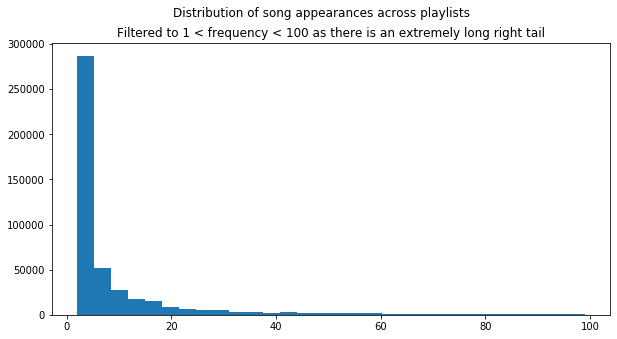

In [256]:
plt.subplots(figsize=(10,5))
plt.hist(songs.loc[(songs['count'] > 1) & (songs['count'] < 100), 'count'], bins = 30)
plt.suptitle('Distribution of song appearances across playlists')
plt.title('Filtered to 1 < frequency < 100 as there is an extremely long right tail')

Text(0.5, 1.0, 'Distribution of number of songs in playlist')

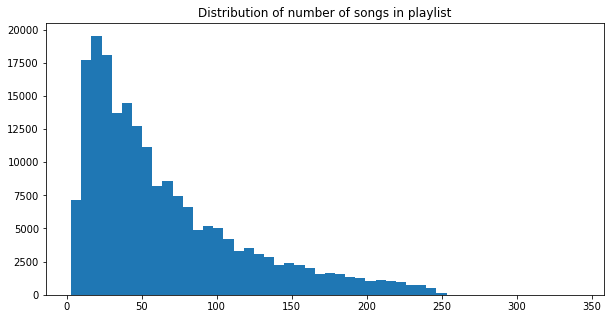

In [257]:
plt.subplots(figsize=(10,5))
playlist_lengths = np.array([len(p) for p in playlists.values], 'int')
plt.hist(playlist_lengths, bins = 50)
plt.title('Distribution of number of songs in playlist')

In [26]:
songs.columns

Index(['artist_name', 'artist_uri', 'track_name', 'album_uri', 'duration_ms',
       'album_name', 'count', 'track_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'artist_genres',
       'artist_popularity', 'album_genres', 'album_popularity',
       'album_release_date'],
      dtype='object')

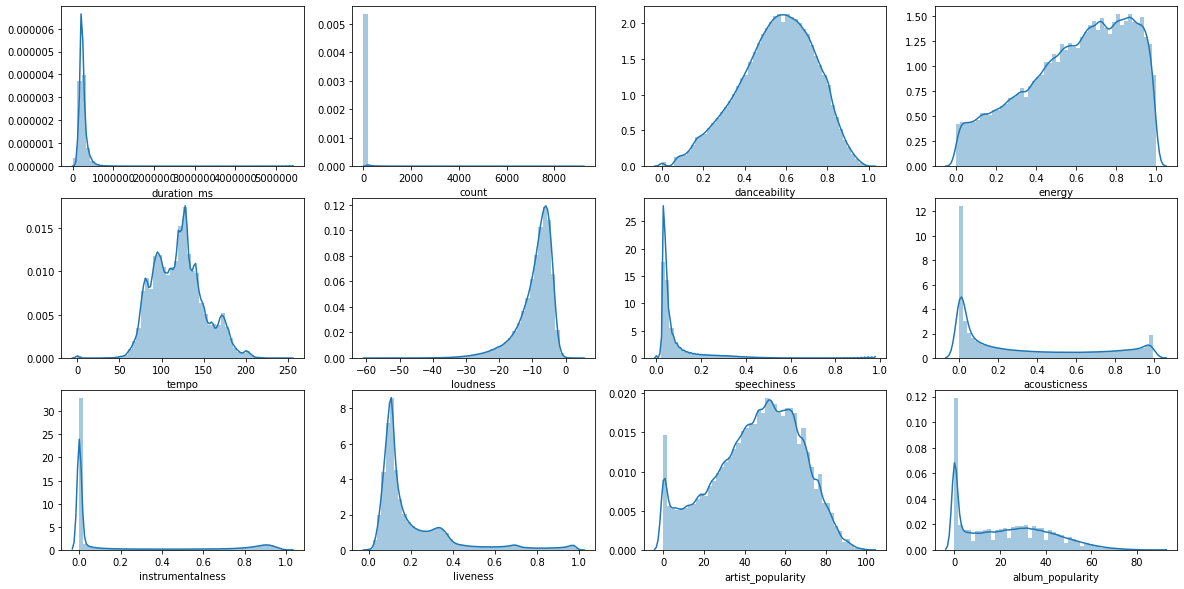

In [51]:
start_time = time.time()
fig, ax = plt.subplots(4,3, figsize=(20,10))
columns = ["duration_ms", "count", "danceability", "energy", "tempo", "loudness",
                "speechiness", "acousticness", "instrumentalness", "liveness",
                "artist_popularity", "album_popularity"] #"valence", "key"
col_iter = iter(columns)
for row in range(3):
    for col in range(4):
        sns.distplot(songs[next(col_iter)], ax=ax[row,col])
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

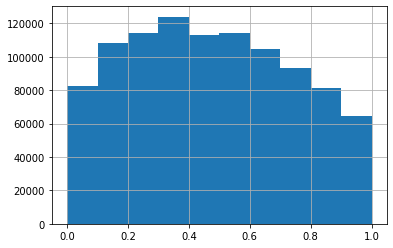

In [47]:
# Valence
songs['valence'].hist();

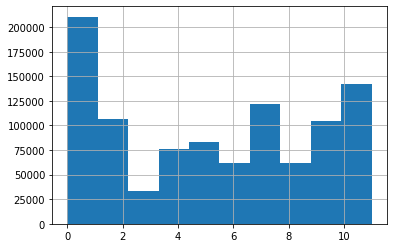

In [147]:
# Valence
songs['key'].hist();

Time elapsed: 277.9259111881256 seconds


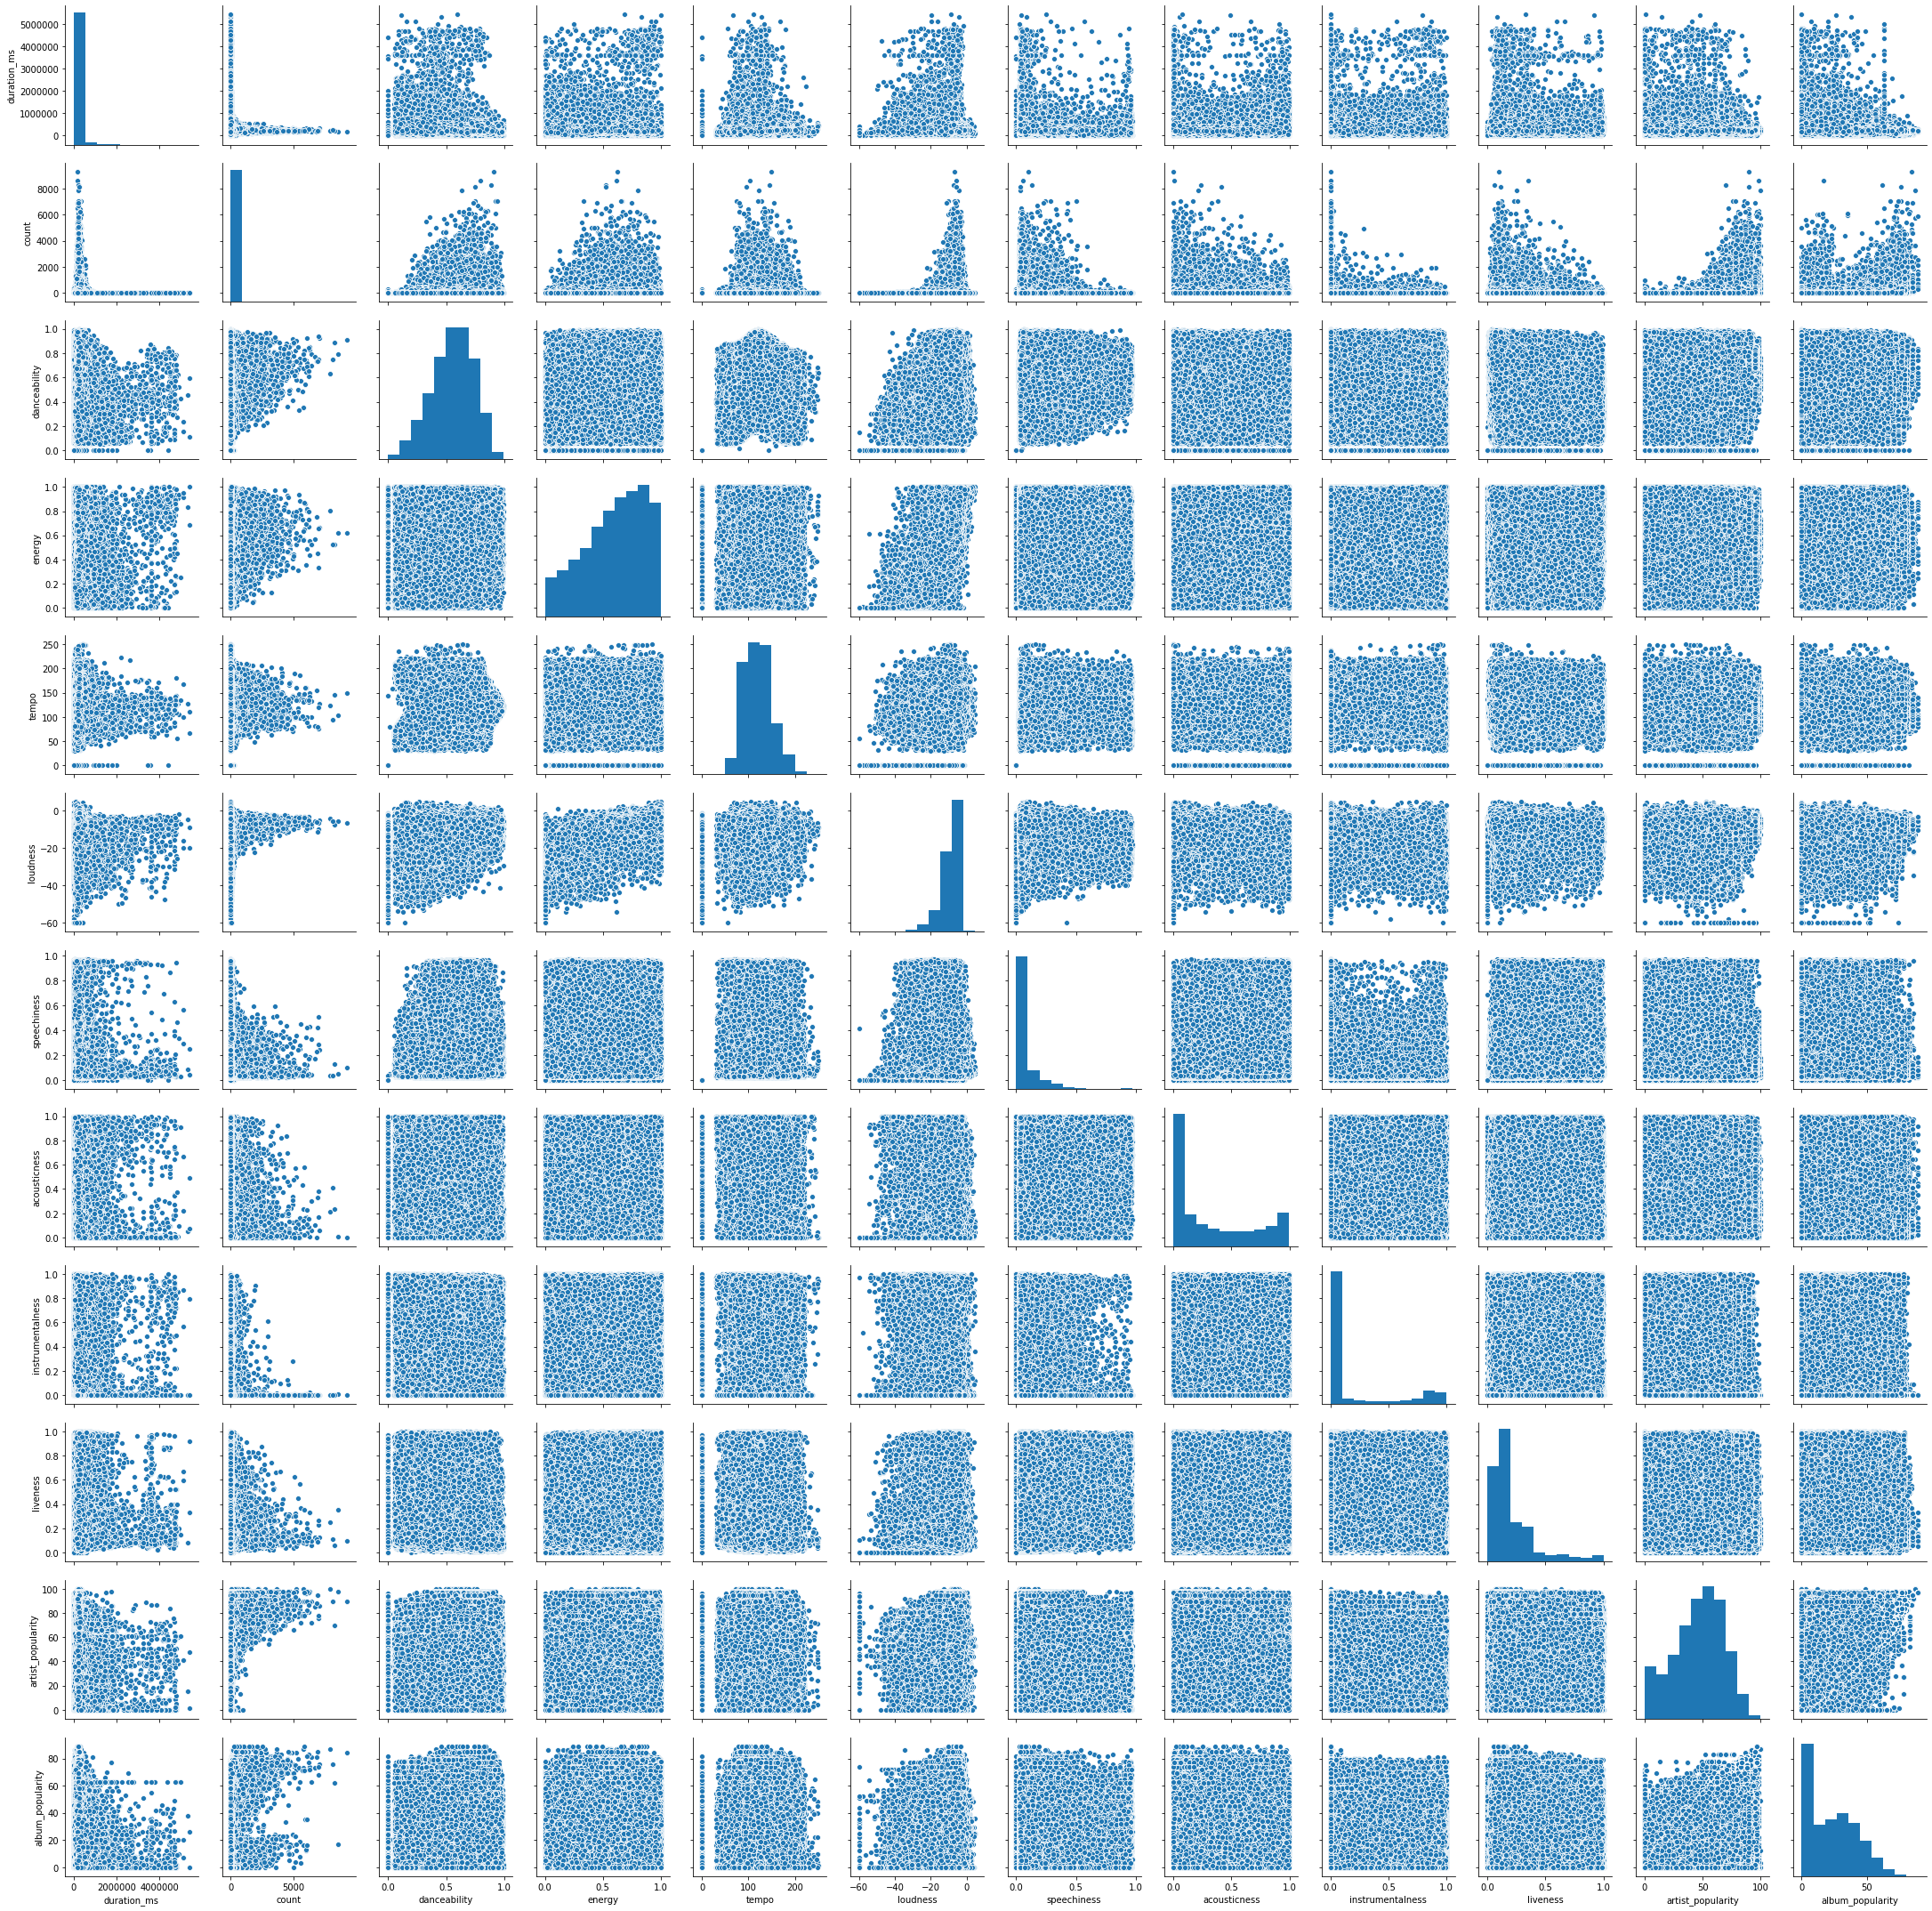

In [87]:
start_time = time.time()
to_plot = ["duration_ms", "count", "danceability", "energy", "tempo", "loudness",
                "speechiness", "acousticness", "instrumentalness", "liveness",
                "artist_popularity", "album_popularity"] #"valence", "key"
df_to_plot = songs.loc[:,to_plot]
sns.pairplot(df_to_plot);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 623.7430670261383 seconds


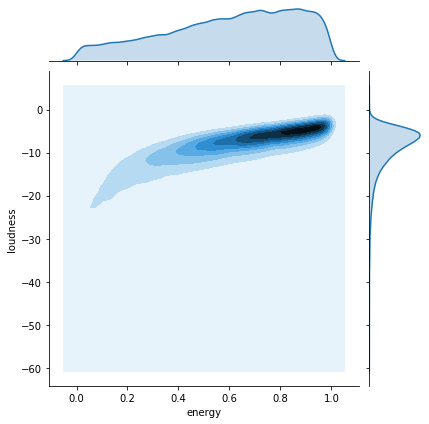

In [88]:
start_time = time.time()
sns.jointplot(x="energy", y="loudness", data=songs, kind="kde"); # LONG RUN TIME
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 547.898 seconds


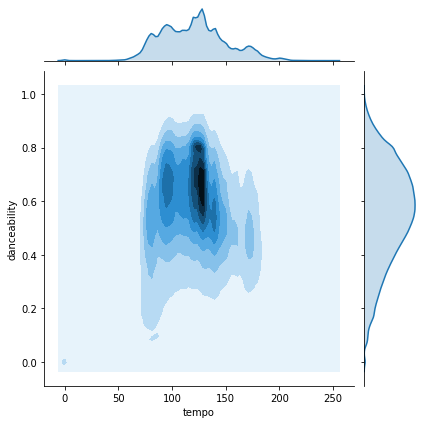

In [258]:
start_time = time.time()
sns.jointplot(x="tempo", y="danceability", data=songs, kind="kde"); # LONG RUN TIME
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 5.188 seconds


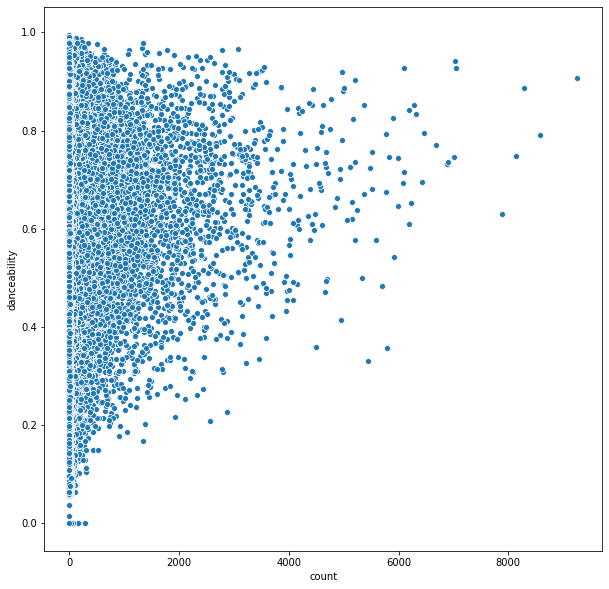

In [259]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="danceability", data=songs)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.2052531242370605 seconds


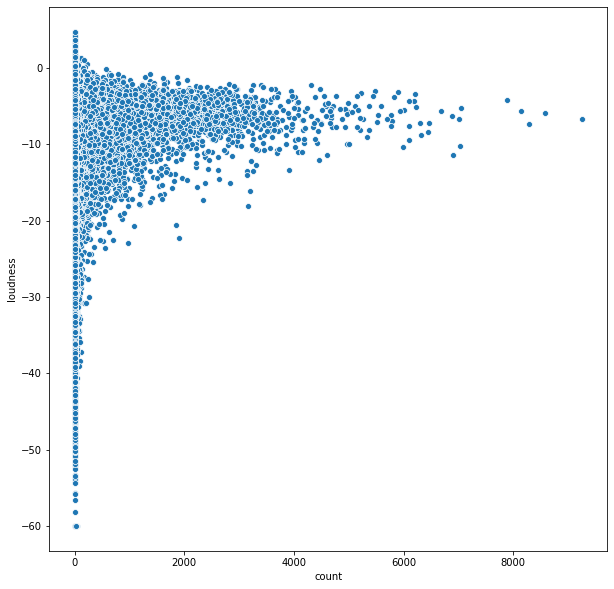

In [154]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="loudness", data=songs);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.078909158706665 seconds


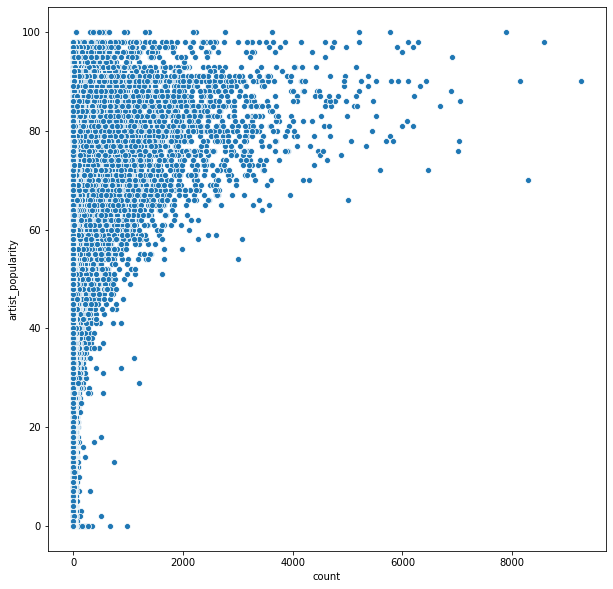

In [153]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="artist_popularity", data=songs);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.1126608848571777 seconds


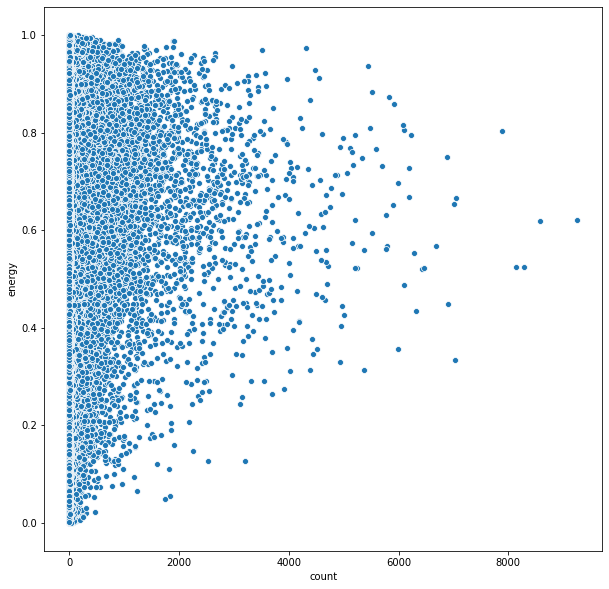

In [152]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="energy", data=songs);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.12072491645813 seconds


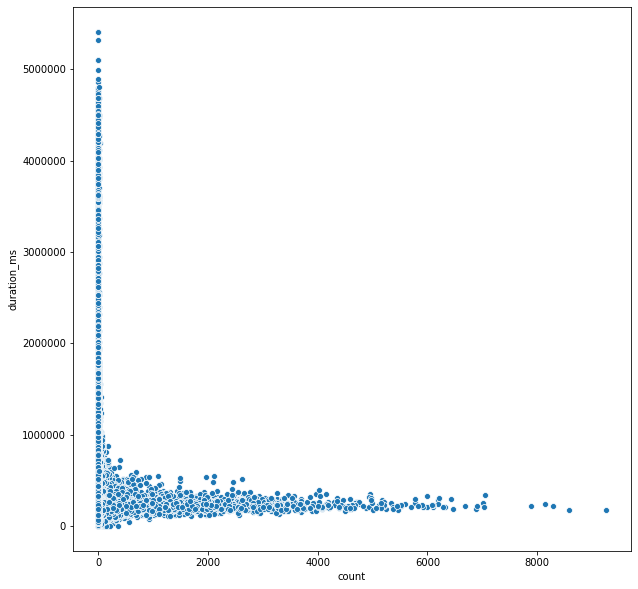

In [151]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="count", y="duration_ms", data=songs);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.6549899578094482 seconds


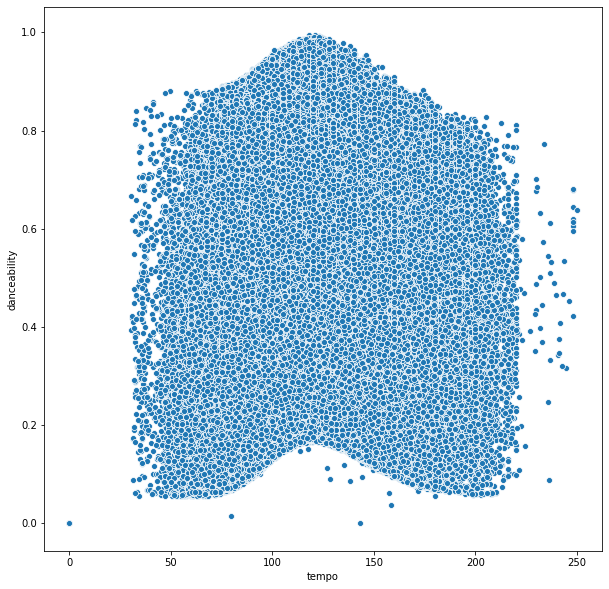

In [148]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="tempo", y="danceability", data=songs); # The sweet spot of danceability
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 2.304630994796753 seconds


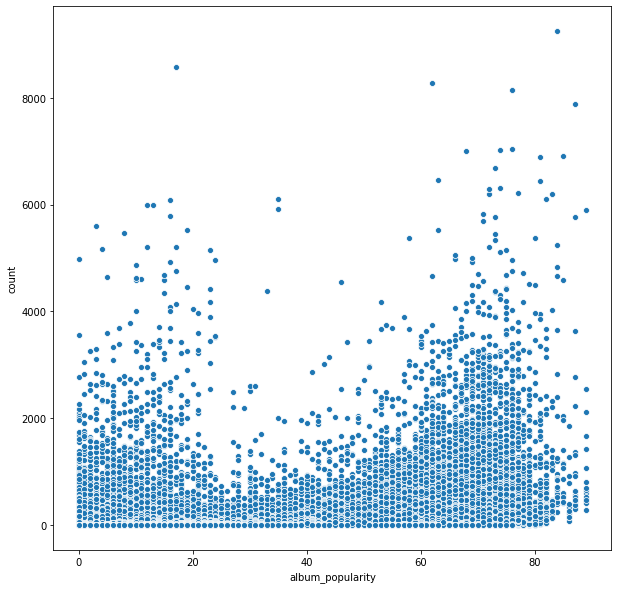

In [149]:
start_time = time.time()
plt.subplots(figsize=(10,10))
sns.scatterplot(x="album_popularity", y="count", data=songs);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

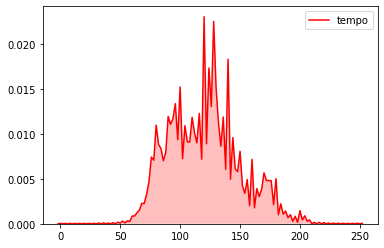

In [110]:
sns.kdeplot(songs.tempo, bw=0.6, label="tempo", shade=True, color="r");


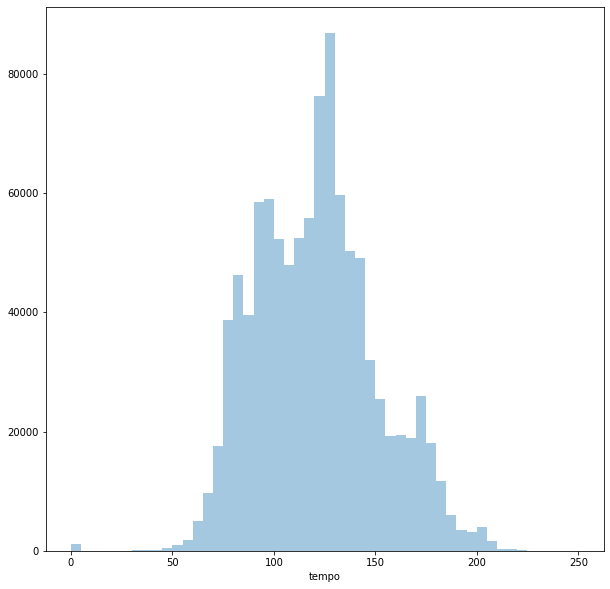

In [150]:
plt.subplots(figsize=(10,10))
sns.distplot(songs.tempo, kde=False, bins=50);

In [191]:
# Derive new release_year column
start_time = time.time()
songs['release_year'] = songs.apply(lambda row: row['album_release_date'][0:4], axis=1)
print(songs[0:5])
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

                               artist_name  \
song_id                                      
0        Sidney Bechet's Blue Note Jazzmen   
159583                       Sidney Bechet   
271702                       Sidney Bechet   
445190                       Sidney Bechet   
626275                       Sidney Bechet   

                                    artist_uri  \
song_id                                          
0        spotify:artist:2XouUSO0EAJ9gMMoHiXqMt   
159583   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   
271702   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   
445190   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   
626275   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk   

                                     track_name  \
song_id                                           
0                                Muskrat Ramble   
159583                             Blue Horizon   
271702   Blame It On The Blues - Alternate Take   
445190                               Summertime   
626275              

In [242]:
century_songs = songs[(songs.release_year.astype(int) > 1950) & (songs.release_year.astype(int) < 2017)]

Time elapsed: 0.753 seconds


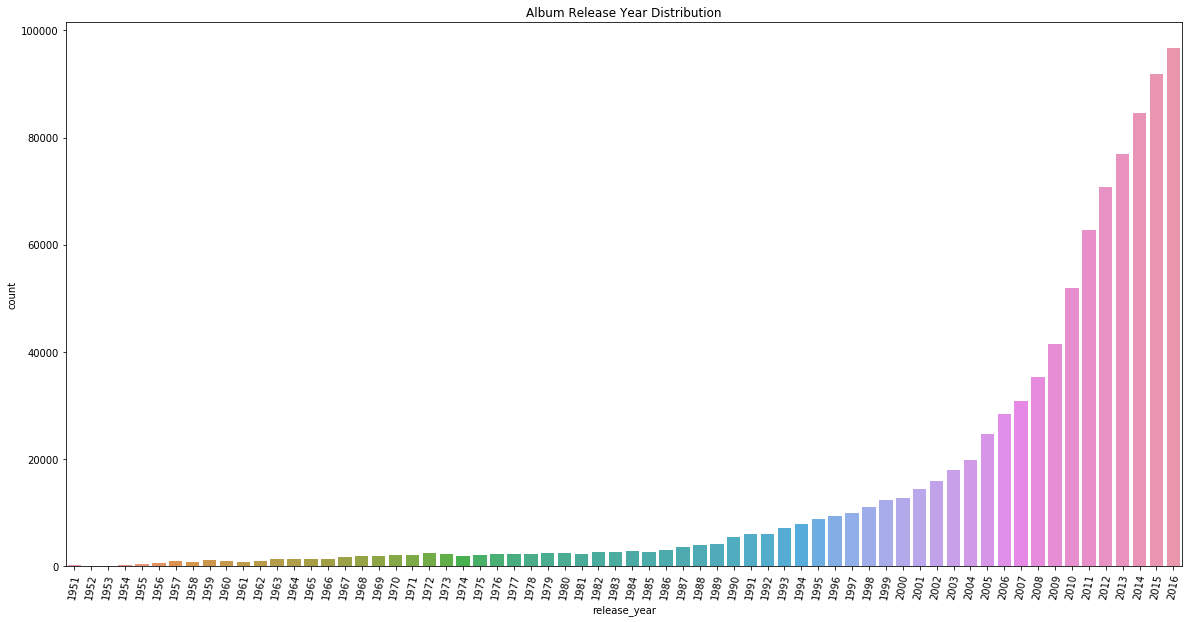

In [243]:
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x="release_year", data=century_songs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set_title("Album Release Year Distribution")
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

In [213]:
songs[0:2]

artist_name  \
song_id                                      
0        Sidney Bechet's Blue Note Jazzmen   
159583                       Sidney Bechet   

                                    artist_uri      track_name  \
song_id                                                          
0        spotify:artist:2XouUSO0EAJ9gMMoHiXqMt  Muskrat Ramble   
159583   spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk    Blue Horizon   

                                    album_uri  duration_ms     album_name  \
song_id                                                                     
0        spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       220293  Jazz Classics   
159583   spotify:album:04hQBJ7YSuNnZ0nbuXNYbY       264933  Jazz Classics   

         count                             track_uri  danceability  energy  \
song_id                                                                      
0            1  spotify:track:0002yNGLtYSYtc0X6ZnFvp         0.455   0.623   
159583       5  spotify:track:1EWPMNHfdVNJwBpG9BcxXB         0.327   0.372   

         ...  liveness  valence    tempo  time_signature  \
song_id  ...                                               
0        ...     0.634    0.951  182.345               4   
159583   ...     0.153    0.380   66.036               4   

                                             artist_genres  artist_popularity  \
song_id                                                                         
0                                                       []                 18   
159583   ['bebop', 'big band', 'cool jazz', 'dixieland'...                 52   

         album_genres  album_popularity  album_release_date  release_year  
song_id                                                                    
0                  []                37          1993-01-01          1993  
159583             []                37          1993-01-01          1993  

[2 rows x 26 columns]

Time elapsed: 102.048 seconds


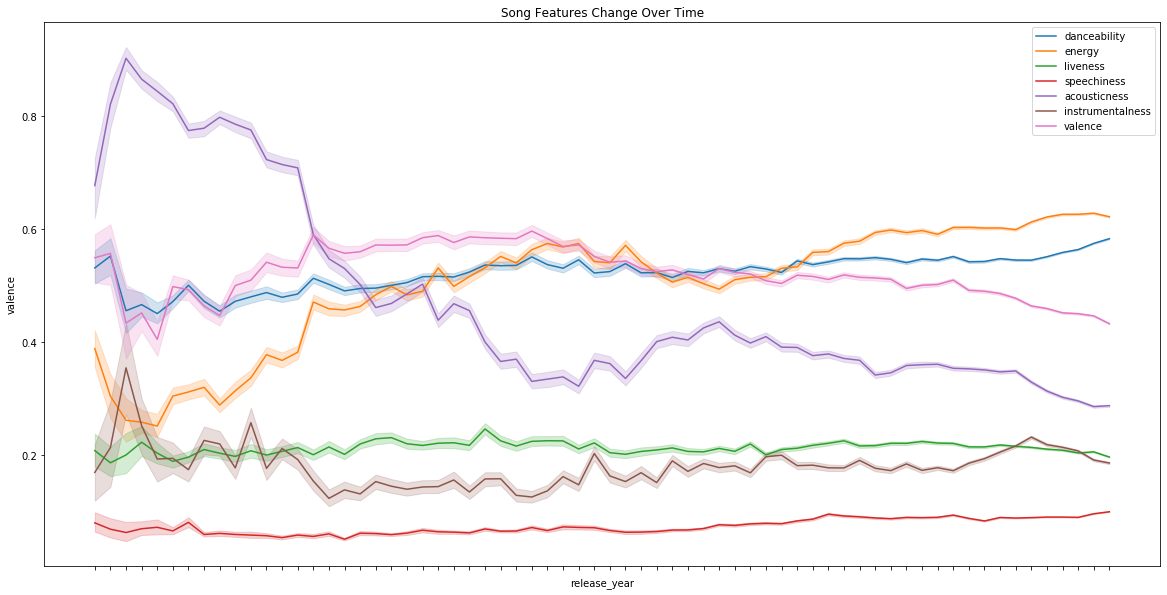

In [244]:
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="release_year", y="danceability", data=century_songs, label="danceability")
sns.lineplot(x="release_year", y="energy", data=century_songs, label="energy")
sns.lineplot(x="release_year", y="liveness", data=century_songs, label="liveness")
sns.lineplot(x="release_year", y="speechiness", data=century_songs, label="speechiness")
sns.lineplot(x="release_year", y="acousticness", data=century_songs, label="acousticness")
sns.lineplot(x="release_year", y="instrumentalness", data=century_songs, label="instrumentalness")
sns.lineplot(x="release_year", y="valence", data=century_songs, label="valence") #, color="#1DB954"
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Song Features Change Over Time");
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 14.683 seconds


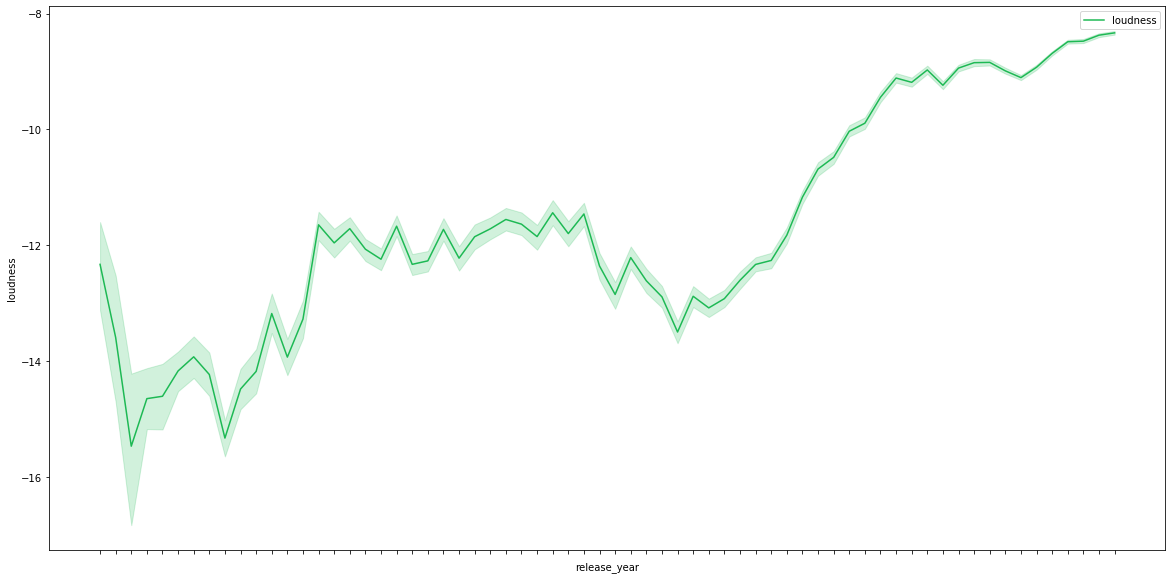

In [245]:
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="release_year", y="loudness", data=century_songs, label="loudness", color="#1DB954")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

Time elapsed: 14.961 seconds


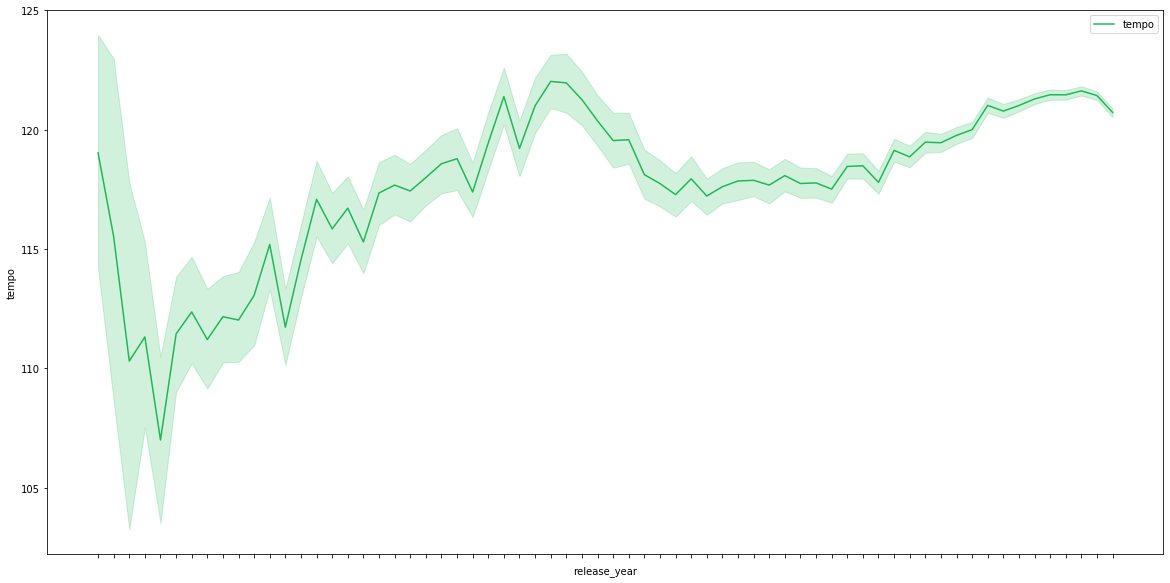

In [246]:
start_time = time.time()
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="release_year", y="tempo", data=century_songs, label="tempo", color="#1DB954")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

999950 100
Time elapsed: 0.088 seconds


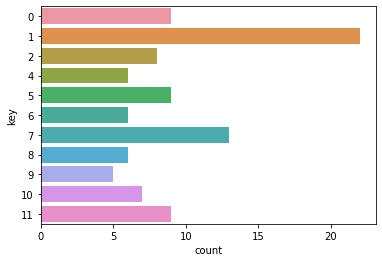

In [249]:
# For the top 100 songs, what keys are they in?
start_time = time.time()
preferred_artists = songs[songs['count'] > 4050]
print(len(songs), len(preferred_artists))
sns.countplot(y="key", data=preferred_artists);
#sns.boxplot(x="artist_name", y="danceability", data=songs)
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

In [250]:
songs.columns

Index(['artist_name', 'artist_uri', 'track_name', 'album_uri', 'duration_ms',
       'album_name', 'count', 'track_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'artist_genres',
       'artist_popularity', 'album_genres', 'album_popularity',
       'album_release_date', 'release_year'],
      dtype='object')

Time elapsed: 5.437 seconds


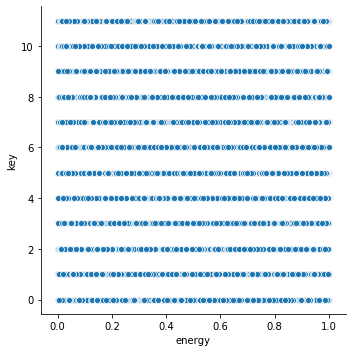

In [253]:
start_time = time.time()
sns.relplot(x="energy", y="key", data=songs);
print('Time elapsed: {} seconds'.format(round(time.time()-start_time, 3)))

In [129]:
songs['artist_genres'].value_counts()[0:10]

[]                                                                            175993
['sleep']                                                                       3401
['gospel']                                                                      2128
['classical', 'classical era', 'early romantic era']                            2014
['contemporary country', 'country', 'country road', 'modern country rock']      1954
['classical', 'classical era']                                                  1920
['ccm', 'christian alternative rock', 'christian music', 'worship']             1847
['baroque', 'classical', 'early music', 'german baroque']                       1766
['soundtrack']                                                                  1765
['banda', 'grupera', 'norteno', 'regional mexican']                             1727
Name: artist_genres, dtype: int64

In [137]:
matching = [s for s in songs['artist_genres'] if "gospel" in s]
print(matching[0:10])


                                                   0
0  ['appalachian folk', 'bluegrass', 'country gos...
1  ['appalachian folk', 'bluegrass', 'country gos...
2  ['appalachian folk', 'bluegrass', 'country gos...
3  ['bakersfield sound', 'country gospel', 'oklah...
4  ['appalachian folk', 'bluegrass', 'country gos...
5  ['appalachian folk', 'banjo', 'bluegrass', 'bl...
6  ['bluegrass', 'bluegrass gospel', 'country', '...
7                        ['gospel', 'naija worship']
8                  ['contemporary gospel', 'gospel']
9                  ['contemporary gospel', 'gospel']


In [140]:
mask = np.column_stack([songs[artist_genres].str.contains("gospel", na=False) for artist_genres in songs])
print(mask)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [138]:
# For rows where artist_genre is contained
sns.boxplot(x="artist_name", y="tempo", data=matching)

ValueError: Could not interpret input 'artist_name'

In [145]:
playlist_lengths = [len(playlist) for playlist in playlists]
print("Largest playlist", max(playlist_lengths))
print("Smallest playlist: ", min(playlist_lengths))

Largest playlist 341
Smallest playlist:  3
